In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
from numpy import mean
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (accuracy_score, auc, f1_score, precision_score,
                             recall_score, roc_auc_score, silhouette_score)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     ShuffleSplit, StratifiedShuffleSplit,
                                     cross_val_score, RandomizedSearchCV, StratifiedKFold)

from sklearn.svm import LinearSVC, SVC
from datetime import datetime

In [4]:
IMAGES_PATH = "Image"

In [10]:
def concat_two_df_and_drop_same_column_in_df2(DF1, DF2):
    display(DF1.head(1))
    display(DF2.head(1))
    DF2.drop(DF2.columns[DF2.columns.isin(DF1.columns)],axis=1,inplace=True)
#     DF1.drop(DF1.columns[DF1.columns.isin(DF2.columns)],axis=1,inplace=True)
    result = pd.concat([DF1, DF2], axis=1)
    display(result.head(1))
    return result
def count_list_val(arr):
    values, counts = np.unique(arr, return_counts=True)
    print(values, counts)
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
four_time = pd.read_csv("CSV/four_time.csv")
v_value = pd.read_csv("CSV/v_value.csv")
mic = pd.read_csv("CSV/mic.csv")
dwt_distance = pd.read_csv("CSV/sdtw_day_score_df.csv")
smart_meter = pd.read_csv("smart_meter.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fdi = pd.read_csv("CSV/FDI.csv")

In [5]:
four_time.shape, v_value.shape, mic.shape, dwt_distance.shape, fdi.shape, smart_meter.shape

((2239250, 7),
 (2239250, 9),
 (2239250, 4),
 (2239250, 5),
 (2239250, 3),
 (41819602, 5))

In [9]:
result = concat_two_df_and_drop_same_column_in_df2(fdi, v_value)
result = concat_two_df_and_drop_same_column_in_df2(result, four_time)
result = concat_two_df_and_drop_same_column_in_df2(result, mic)
result = concat_two_df_and_drop_same_column_in_df2(result, dwt_distance)
result.columns

,MeterID,Day,FDI
0,1236,2009-07-15,1.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,5212,2010-12-31,True,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561


,MeterID,Day,FDI,overnight,breakfast,daytime,evening
0,1236,2009-07-15,True,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0


,MeterID,Day,FDI,mic
0,1236,2009-07-15,True,0.624128


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128


,MeterID,Day,FDI,meter_dtw,meter_sdtw
0,1236,2009-07-15,True,2.283294,-68.276715


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic,meter_dtw,meter_sdtw
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128,2.283294,-68.276715


Index(['MeterID', 'Day', 'FDI', 'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2',
       'Cmin1', 'overnight', 'breakfast', 'daytime', 'evening', 'mic',
       'meter_dtw', 'meter_sdtw'],
      dtype='object')

In [11]:
df = result
X = df[['overnight', 'breakfast', 'daytime', 'evening',
       'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1', 'mic',
       'meter_dtw', 'meter_sdtw']]
Y = df[["FDI"]]

partition = 422*8*530
evaluation = 422*1*530
total = 2239250


X_train = X[:partition]
X_val = X[partition:total-evaluation]
X_test = X[total-evaluation: total]
y_train = Y[:partition]
y_val = Y[partition:total-evaluation]
y_test = Y[total-evaluation: total]
# y_train = np.array(Y[:partition]).reshape(-1) 
# y_val = np.array(Y[partition:total-evaluation]).reshape(-1) 
# y_test = np.array(Y[total-evaluation: total]).reshape(-1) 

In [12]:
count_list_val(Y)

[0. 1.] [2127950  111300]


### read smart_meter.csv and preprocess

In [9]:
elec = smart_meter['Electricity']
elec = np.array(elec).reshape(-1, 48)
elec = pd.DataFrame(elec)
print(elec.shape)
display(elec.head(3))

(2239250, 48)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.13407,0.129562,0.113616,0.18602,0.075942,0.133117,0.062728,0.064174,0.143932,0.142687,...,0.159253,0.154713,0.118059,0.13057,0.118797,0.056694,0.106094,0.08098,0.068501,0.204674
1,0.48300,0.062000,0.035000,0.06800,0.026000,0.013000,0.063000,0.063000,0.013000,0.013000,...,0.138000,0.099000,0.118000,0.16400,0.218000,0.412000,0.253000,0.61000,0.582000,0.292000
2,0.11400,0.041000,0.012000,0.04000,0.067000,0.017000,0.012000,0.064000,0.058000,0.012000,...,0.110000,0.104000,0.164000,0.40100,0.104000,0.138000,0.206000,0.36300,0.526000,0.326000


In [10]:
result = concat_two_df_and_drop_same_column_in_df2(result, elec)

,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,breakfast,daytime,evening,mic,meter_dtw,meter_sdtw
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,15.5,24.5,38.0,0.624128,2.283294,-68.276715


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.13407,0.129562,0.113616,0.18602,0.075942,0.133117,0.062728,0.064174,0.143932,0.142687,...,0.159253,0.154713,0.118059,0.13057,0.118797,0.056694,0.106094,0.08098,0.068501,0.204674


,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1,overnight,...,38,39,40,41,42,43,44,45,46,47
0,1236,2009-07-15,1.0,12,30,15,0.046464,0.047532,0.013561,5.380015,...,0.159253,0.154713,0.118059,0.13057,0.118797,0.056694,0.106094,0.08098,0.068501,0.204674


## Start Model Training 

In [11]:
result["FDI"] = result["FDI"].astype(int)

## LinearSVM

In [24]:
def train_model(df, x_col, y_col, score = False, split_num = 3, return_model=False ):
    
    X = df[x_col]
    Y = df[y_col]

    partition = 422*8*530
    evaluation = 422*1*530
    total = 2239250

    round = 1
    average_score = {}
    average_score["precision_score"] = 0
    average_score["recall_score"] = 0
    average_score["accuracy_score"] = 0
    average_score["roc_auc_score"] = 0
    average_score["f1_score"] = 0

    X_train = X[:partition+evaluation]
    y_train = Y[:partition+evaluation]

    sss = StratifiedShuffleSplit(n_splits=split_num, test_size=0.4, random_state=1)
    for train_index, test_index in sss.split(X_train, y_train):
#         test_index = np.concatenate((np.array(test_index), np.array(X[total-(partition+evaluation): total].index)))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = np.array(Y.iloc[train_index]).reshape(-1) , np.array(Y.iloc[test_index]).reshape(-1)

        model = LinearSVC(max_iter=100000000 )
        model.fit(X_train, Y_train)
        y_hat = model.predict(X_test)
        average_score["precision_score"] += precision_score(Y_test, y_hat)
        average_score["recall_score"] += recall_score(Y_test, y_hat)
        average_score["accuracy_score"] += accuracy_score(Y_test, y_hat)
        average_score["roc_auc_score"] += roc_auc_score(Y_test, y_hat) 
        average_score["f1_score"] += f1_score(Y_test, y_hat)

        if score:
            print("round: " + str(round))
            print("precision score: " + str(precision_score(Y_test, y_hat)))
            print("recall_score: " + str(recall_score(Y_test, y_hat)))
            print("accuracy_score: " + str(accuracy_score(Y_test, y_hat)))
            print("roc_auc_score: " + str(roc_auc_score(Y_test, y_hat)))
            print("f1_score: " + str(f1_score(Y_test, y_hat)))
            print()

        round += 1
    for key, score in average_score.items():
        average_score[key] = score / split_num
        print("average_" + key + ": " + str(average_score[key]))
    if return_model==True:
        return model, average_score
    return average_score

def get_permutation_importance(model, X_val, y_val, title=None, origin=False, save=False):
    
    if save_fig == True and title == None:
        raise NameError('Please type the title for the chart to save')
        
    r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
    four_time_importance = sum(r.importances_mean[:3])
    mic_importance = r.importances_mean[10]
    v_value_importance = sum(r.importances_mean[4:10])
    dtw_importance = r.importances_mean[11]
    sdtw_importance = r.importances_mean[12]
    if origin == True:
        print('include origin data')
        origin_importance = sum(r.importances_mean[13:])
        importance = { "four_time": four_time_importance, "mic": mic_importance, "v_value": v_value_importance,
                  "dtw": dtw_importance, "sdtw": sdtw_importance, 'origin':origin_importance}
    else:
        print('no origin data')
        importance = { "four_time": four_time_importance, "mic": mic_importance, "v_value": v_value_importance, "dtw": dtw_importance, "sdtw": sdtw_importance}
    
    importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True))
    
    y_label = list(importance.keys())
    y_pos = np.arange(len(importance))

    plt.rcdefaults()
    fig, ax = plt.subplots()

    ax.barh(y_pos, list(importance.values()), align='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_label)

    ax.set_xlabel('Importance Mean')
    ax.set_title('Permutation importance')
    
    if save == True:
        save_fig('Permutation importance: '+ title)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, image_path = IMAGES_PATH):
    path = os.path.join(image_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [21]:
def plot_importance(importance):
    importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True))
    
    y_label = list(importance.keys())
    y_pos = np.arange(len(importance))

    plt.rcdefaults()
    fig, ax = plt.subplots()

    ax.barh(y_pos, list(importance.values()), align='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_label)

    ax.set_xlabel('Importance Mean')
    ax.set_title('Permutation importance')
def save_importance(importance, title, size=(10,10)):
    y_label = list(importance.keys())
    y_pos = np.arange(len(importance))
    
    
    plt.rcdefaults()
#     fig, ax = plt.subplots()
    plt.figure(dpi=150, figsize=size)
    plt.barh(y_pos, list(importance.values()), align='center')

#     ax.set_yticks(y_pos)
#     ax.set_yticklabels(y_label)
    plt.yticks(y_pos, y_label)
    plt.xlabel('Importance Mean')
#     ax.set_xlabel('Importance Mean')
#     ax.set_title('Permutation importance')
    plt.title('Permutation importance')

    save_fig('Permutation importance: '+ title)
def cal_importance_dict():
    importance_dict = {r}
    for index, key in zip(range(len(col)), col):
        print(f'{key}: ', r.importances[index], r.importances_mean[index])
        importance_dict[key] = r.importances_mean[index]
    return importance_dict

## 13 features

In [ ]:
# 6:4 and seperate train and test dataset
# 13 features
TITLE = "LinearSVM: 13 features with 0.4 test data"
col = ['overnight', 'breakfast', 'daytime', 'evening',
       'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1', 'mic',
       'meter_dtw', 'meter_sdtw']
start_time = timer(None)
model, score = train_model(result, col, ['FDI'], return_model=True)
timer(start_time)

In [ ]:
r = permutation_importance(model, result_all[col], result_all['FDI'], n_repeats=3, random_state=0, n_jobs=-1)
importance_dict = {}
for index, key in zip(range(len(col)), col):
    print(f'{key}: ', r.importances[index], r.importances_mean[index])
    importance_dict[key] = r.importances_mean[index]
plot_importance(importance_dict)

In [ ]:
save_importance(importance_dict, "RandomForest with 48 features", size=(8,10))

## each class of features

In [ ]:
# 6:4 and seperate train and test dataset
# Train 4 class of labels
classes = [['meter_dtw', 'meter_sdtw'], ['Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1'], ['overnight', 'breakfast', 'daytime', 'evening'], ['mic']]
for col in classes:
    start_time = timer(None)
    model, score = train_model(result, col, ['FDI'], return_model=True)
    timer(start_time)

In [1]:
1

1

## 13+48 features

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


average_precision_score: 0.02796674225245654
average_recall_score: 0.0012312402249509168
average_accuracy_score: 0.9495596821895668
average_roc_auc_score: 0.5002270039519683
average_f1_score: 0.00235864091285778
include origin data
Saving figure Permutation importance: LinearSVM: 13 + 48 features with 0.4 test data


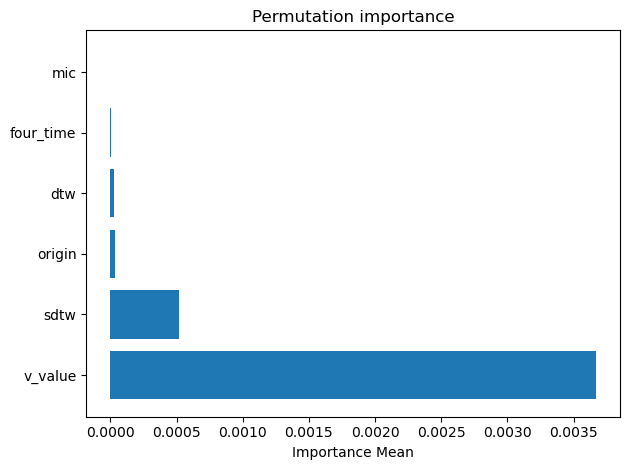

In [13]:
# 6:4 and seperate train and test dataset
# 13 + 48 features
TITLE = "LinearSVM: 13 + 48 features with 0.4 test data"
col = result.drop(['Day', 'MeterID', 'FDI'], axis=1).columns
model, score = train_model(result, col, ['FDI'], return_model=True)
get_permutation_importance(model, result[col][partition:], result['FDI'][partition:], title= TITLE, origin=True,save=True)

## old(all meter is false)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


average_precision_score: 0.03600522836780596
average_recall_score: 0.3116202455825097
average_accuracy_score: 0.6602883510354672
average_roc_auc_score: 0.505222798873494
average_f1_score: 0.06172758283305967
no origin data
Saving figure Permutation importance: LinearSVM: 13 features with 0.4 test data


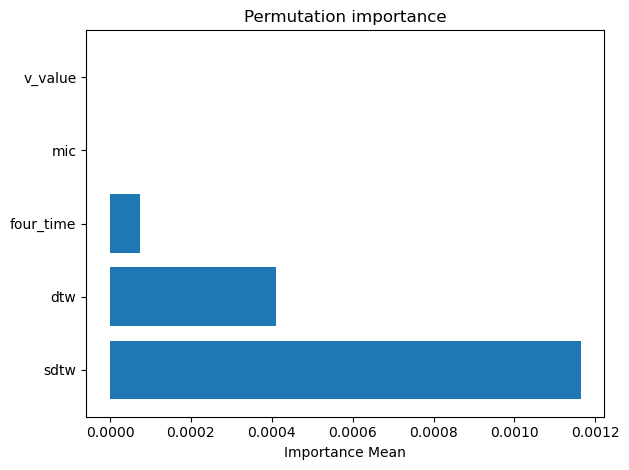

In [15]:
# 6:4 and seperate train and test dataset
# 13 features
TITLE = "LinearSVM: 13 features with 0.4 test data"
col = ['overnight', 'breakfast', 'daytime', 'evening',
       'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1', 'mic',
       'meter_dtw', 'meter_sdtw']
model, score = train_model(result, col, ['FDI'], return_model=True)
get_permutation_importance(model, result[col][partition:], result['FDI'][partition:], title= TITLE, save=True)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


average_precision_score: 0.01265022137887413
average_recall_score: 0.0002495757212738345
average_accuracy_score: 0.8997999609195174
average_roc_auc_score: 0.4997367632918775
average_f1_score: 0.0004894942300867629
include origin data
Saving figure Permutation importance: LinearSVM: 13 + 48 features with 0.4 test data


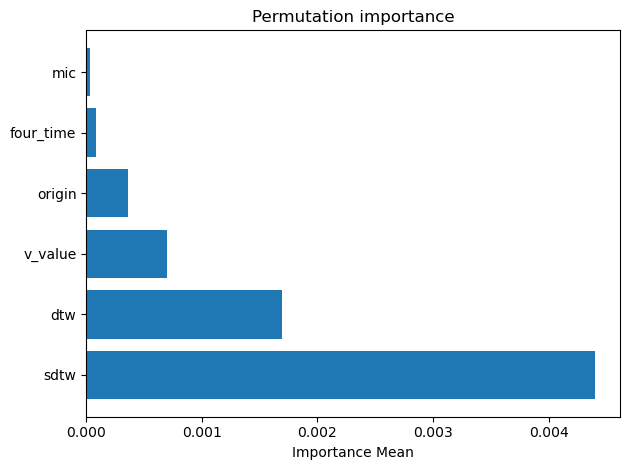

In [17]:
# 6:4 and seperate train and test dataset
# 13 + 48 features
TITLE = "LinearSVM: 13 + 48 features with 0.4 test data"
col = result.drop(['Day', 'MeterID', 'FDI'], axis=1).columns
model, score = train_model(result, col, ['FDI'], return_model=True)
get_permutation_importance(model, result[col][partition:], result['FDI'][partition:], title= TITLE, origin=True,save=True)

## SVM

In [13]:
def train_model(df, x_col, y_col, score = False, split_num = 3, return_model=False ):
    
    X = df[x_col]
    Y = df[y_col]

    partition = 422*8*530
    evaluation = 422*1*530
    total = 2239250

    round = 1
    average_score = {}
    average_score["precision_score"] = 0
    average_score["recall_score"] = 0
    average_score["accuracy_score"] = 0
    average_score["roc_auc_score"] = 0
    average_score["f1_score"] = 0

    X_train = X[:partition+evaluation]
    y_train = Y[:partition+evaluation]

    sss = StratifiedShuffleSplit(n_splits=split_num, test_size=0.4, random_state=1)
    for train_index, test_index in sss.split(X_train, y_train):
#         test_index = np.concatenate((np.array(test_index), np.array(X[total-(partition+evaluation): total].index)))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = np.array(Y.iloc[train_index]).reshape(-1) , np.array(Y.iloc[test_index]).reshape(-1)

        model = SVC()
        model.fit(X_train, Y_train)
        y_hat = model.predict(X_test)
        average_score["precision_score"] += precision_score(Y_test, y_hat)
        average_score["recall_score"] += recall_score(Y_test, y_hat)
        average_score["accuracy_score"] += accuracy_score(Y_test, y_hat)
        average_score["roc_auc_score"] += roc_auc_score(Y_test, y_hat)
        average_score["f1_score"] += f1_score(Y_test, y_hat)

        if score:
            print("round: " + str(round))
            print("precision score: " + str(precision_score(Y_test, y_hat)))
            print("recall_score: " + str(recall_score(Y_test, y_hat)))
            print("accuracy_score: " + str(accuracy_score(Y_test, y_hat)))
            print("roc_auc_score: " + str(roc_auc_score(Y_test, y_hat)))
            print("f1_score: " + str(f1_score(Y_test, y_hat)))
            print()

        round += 1
    for key, score in average_score.items():
        average_score[key] = score / split_num
        print("average_" + key + ": " + str(average_score[key]))
    if return_model==True:
        return model, average_score
    return average_score

In [ ]:
# 6:4 and seperate train and test dataset
# 13 features
TITLE = "SVM: 13 features with 0.4 test data"
col = ['overnight', 'breakfast', 'daytime', 'evening',
       'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1', 'mic',
       'meter_dtw', 'meter_sdtw']
model, score = train_model(result, col, ['FDI'], return_model=True)
get_permutation_importance(model, result[col][partition:], result['FDI'][partition:], title= TITLE, save=True)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model, score

In [ ]:
# 6:4 and seperate train and test dataset
# 13 + 48 features
TITLE = "SVM: 13 + 48 features with 0.4 test data"
col = result.drop(['Day', 'MeterID', 'FDI'], axis=1).columns
model, score = train_model(result, col, ['FDI'], return_model=True)
get_permutation_importance(model, result[col][partition:], result['FDI'][partition:], title= TITLE, origin=True, save=True)

In [ ]:
1